In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [2]:
iris = load_iris()
X_class, y_class = iris.data, iris.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=10)

In [3]:
X_reg, y_reg = make_regression(n_samples=200, n_features=4, noise=0.3, random_state=10)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=10)

In [11]:
clf_tree = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    random_state=10
)
clf_tree.fit(X_train_c, y_train_c)

y_pred_c = clf_tree.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Confusion matrix:\n", confusion_matrix(y_test_c, y_pred_c))
print("Classification report:\n", classification_report(y_test_c, y_pred_c))

Accuracy: 1.0
Confusion matrix:
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
# reg_tree = DecisionTreeRegressor, random_state=10)
# reg_tree.fit(X_train_r, y_train_r)

# y_pred_r = reg_tree.predict(X_test_r)

# print("MSE:", mean_squared_error(y_test_r, y_pred_r))
# print("R2 score:", r2_score(y_test_r, y_pred_r))

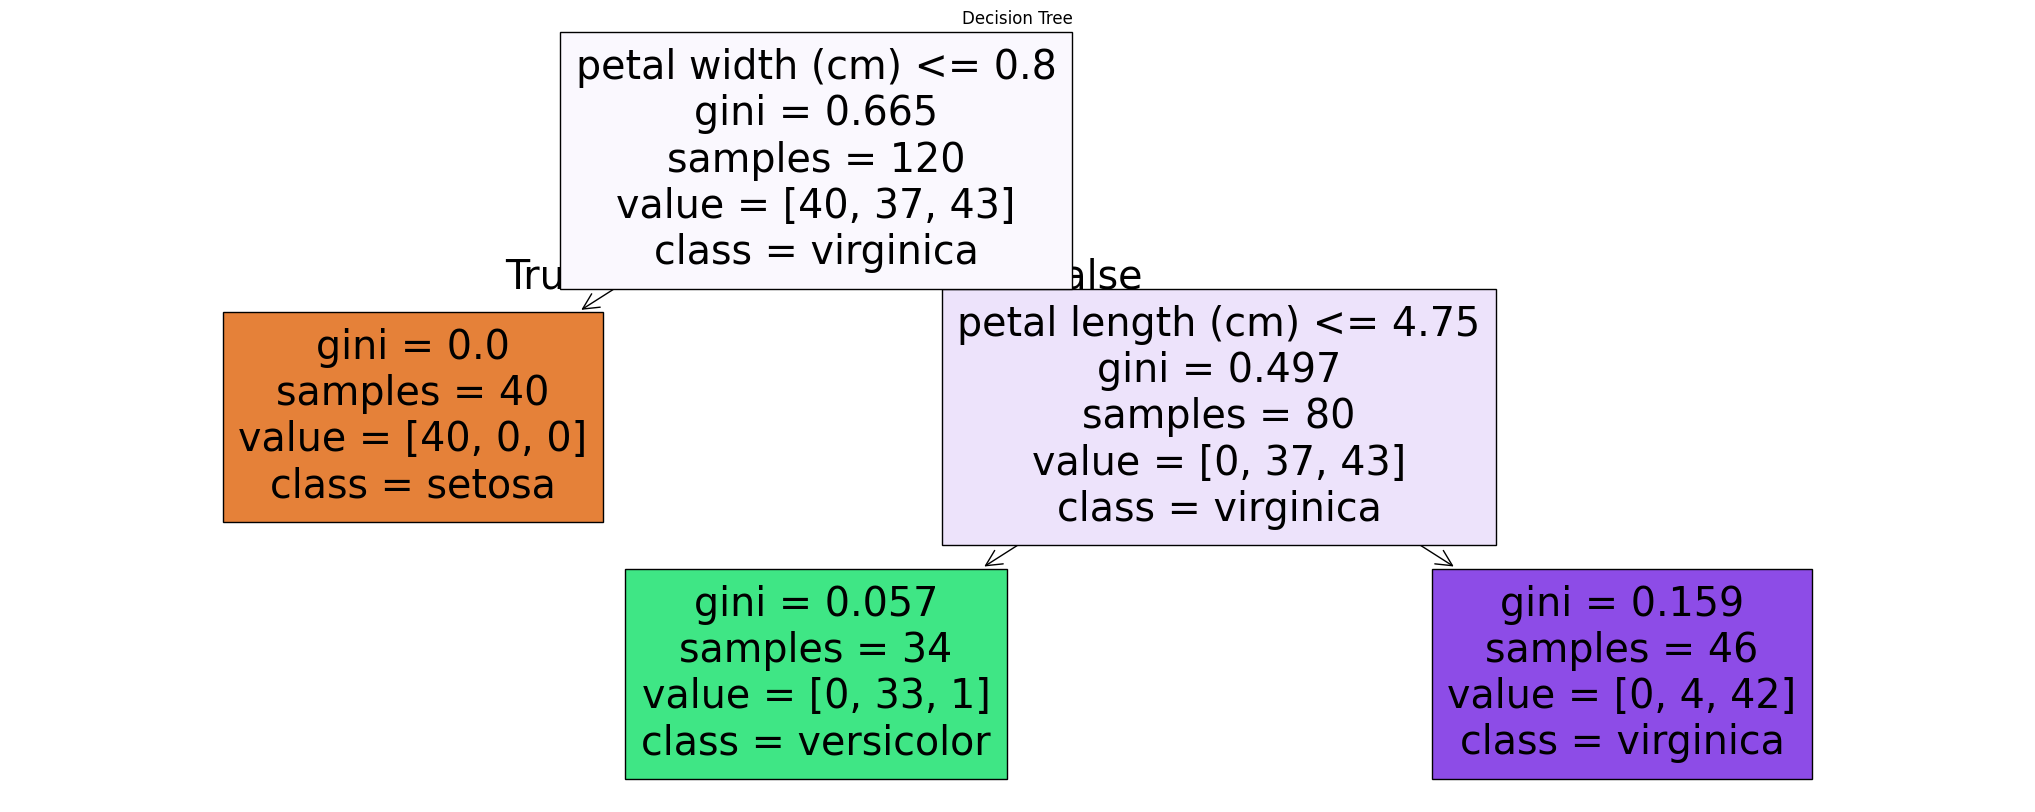

In [6]:
plt.figure(figsize=(26, 10))
plot_tree(clf_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree")
plt.show()

In [7]:
text = export_text(clf_tree, feature_names=iris.feature_names)
print(text)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- class: 2



In [13]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=10), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_c, y_train_c)

print("Best param:", grid.best_params_)
print("Best CV:", grid.best_score_)

best_clf_test = grid.best_estimator_
y_pred_best = best_clf_test.predict(X_test_c)
print("Test accuracy:", accuracy_score(y_test_c, y_pred_best))

Best param: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Best CV: 0.9333333333333332
Test accuracy: 0.9333333333333333


In [15]:
important = best_clf_test.feature_importances_
feature = iris.feature_names

for f, i in zip(feature, important):
    print(f"{f}: {i:.4f}")

sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.4324
petal width (cm): 0.5676
